In [167]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

from pandas_datareader import data as pdr
import datetime
import yfinance as yf

p-value = 3.2598989439716987e-15 The series A is likely stationary.
p-value = 0.8856176680888076 The series B is likely non-stationary.


<ipython-input-8-de912190a608>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A = pd.Series(index=range(n))
<ipython-input-8-de912190a608>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B = pd.Series(index=range(n))


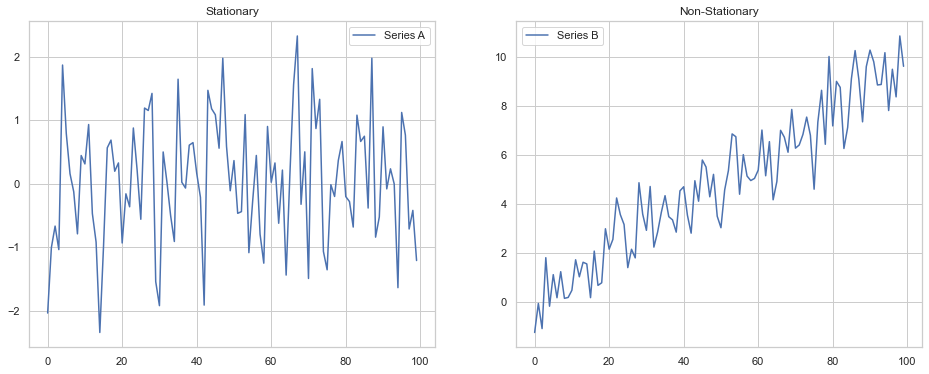

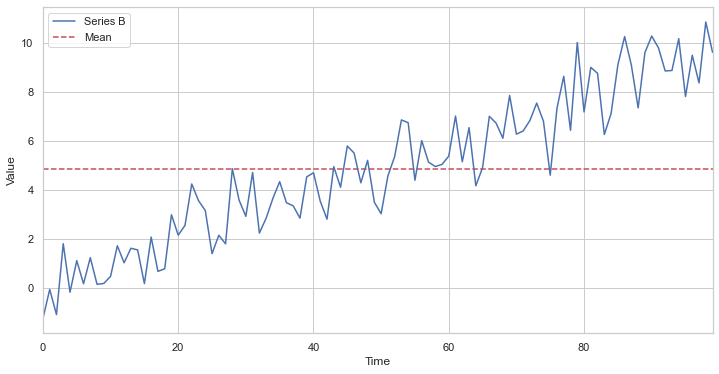

In [8]:
#Stationarity/Non-Stationarity, test to gen random data
def generateData(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

#use pvalue to determine whether the series is stationary, adfuller unit root 
def stationarityTest(X, cutoff=0.01):
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')

params = (0,1)
n = 100

#A -> Stationary
#B -> Non-Stationary
A = pd.Series(index=range(n))
A.name = 'A'
for t in range(n):
    A[t] = generateData(params)

B = pd.Series(index=range(n))
B.name = 'B'

for t in range(n):
    params = (t * 0.1, 1)
    B[t] = generateData(params)
    
fig, (ax1, ax2) = plt.subplots(nrows =1, ncols =2, figsize=(16,6))


mean = np.mean(B)
stationarityTest(A)
stationarityTest(B)
ax1.plot(A)
ax2.plot(B)
ax1.legend(['Series A'])
ax2.legend(['Series B'])
ax1.set_title('Stationary')
ax2.set_title('Non-Stationary')
plt.figure(figsize=(12,6))
plt.plot(B)
plt.hlines(mean, 0, len(B), linestyles='dashed', colors = 'r')
plt.xlabel('Time')
plt.xlim([0, 99])
plt.ylabel('Value')
plt.legend(['Series B', 'Mean'])


1.2471766096334844e-05


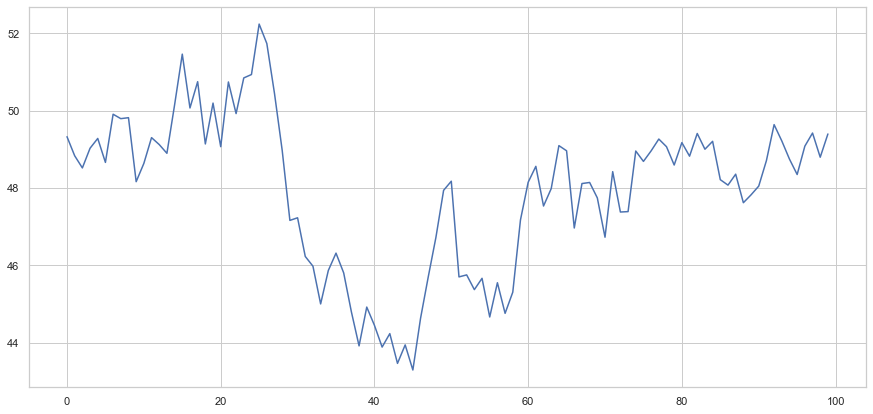

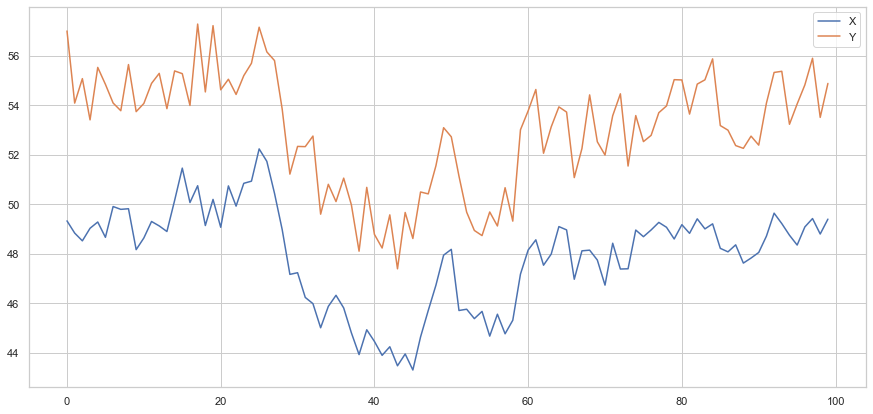

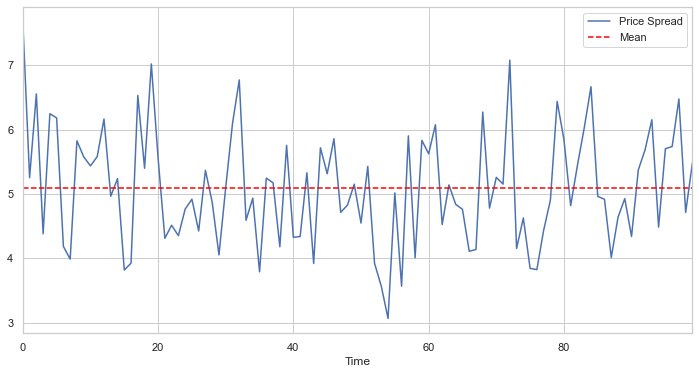

In [12]:
#Testing Cointegration func, with rand data
Xreturns = np.random.normal(0, 1, 100)

X = pd.Series(np.cumsum(Xreturns), name='X') + 50
X.plot(figsize=(15,7))

noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'

#Lower the pvalue = higher cointegration
score, pvalue, _ = coint(X,Y)
print(pvalue)

pd.concat([X, Y], axis=1).plot(figsize=(15, 7))
plt.figure(figsize=(12,6))
(Y - X).plot() #Spread
plt.axhline((Y - X).mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.xlim(0,99)
plt.legend(['Price Spread', 'Mean'])

In [98]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            try:
                result = coint(S1, S2)
                score = result[0]
                pvalue = result[1]
            except:
                score = 0
                pvalue = 0
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [32]:
#Temp coins to check out
#['ADA', 'AION', 'ANT', 'ARDR', 'BAT', 'BCC', 'BCH', 'BLZ', 'BNB', 'BNT', 'BTC', 'BTS', 'BUSD', 
#            'CTXC', 'CVC', 'DAI', 'DASH', 'DATA', 'DCR', 'DENT', 'DGB', 'DNT', 'DOGE', 'ENJ', 'EOS', 'ETC', 
#            'ETH', 'FUN', 'GTO', 'GXS', 'ICX', 'IOST', 'IOTA', 'IOTX', 'KMD', 'KNC', 'LEND', 'LINK', 'LRC', 
#            'LSK', 'LTC', 'MANA', 'MCO', 'MITH', 'MKR', 'NANO', 'NEO', 'NMR', 'NPXS', 'NULS', 'OMG', 'ONT', 
#            'QTUM', 'REP', 'RLC', 'SC', 'SNX', 'STORJ', 'STORM', 'STRAT', 'STX', 'THETA', 'TRX', 'TUSD', 'UTK', 
#            'VEN', 'WAN', 'WAVES', 'WTC', 'XLM', 'XMR', 'XRP', 'XTZ', 'XZC', 'ZEC', 'ZEN', 'ZIL', 'ZRX']


In [73]:
#Data load start=
start = datetime.datetime(2021, 11, 1)
end = datetime.datetime(2021, 11, 7)
# coin = ['BTC-USD','ETH-USD','OMG-USD','MANA-USD']
coin = ['OMG-USD','MANA-USD','SAND-USD','SHIB-USD','DOGE-USD','LRC-USD']
#ata = yf.download(tickers=tickers, period='5d',nterval='5m')['Adj Close'] #Interval parameter
#Start/End Data parameter
data = yf.download(tickers=coin, start = start, end = end,interval='5m')['Adj Close']

[*********************100%***********************]  6 of 6 completed


[('DOGE-USD', 'OMG-USD'), ('DOGE-USD', 'SHIB-USD'), ('LRC-USD', 'SHIB-USD'), ('MANA-USD', 'OMG-USD'), ('MANA-USD', 'SHIB-USD'), ('OMG-USD', 'SHIB-USD'), ('SAND-USD', 'SHIB-USD')]


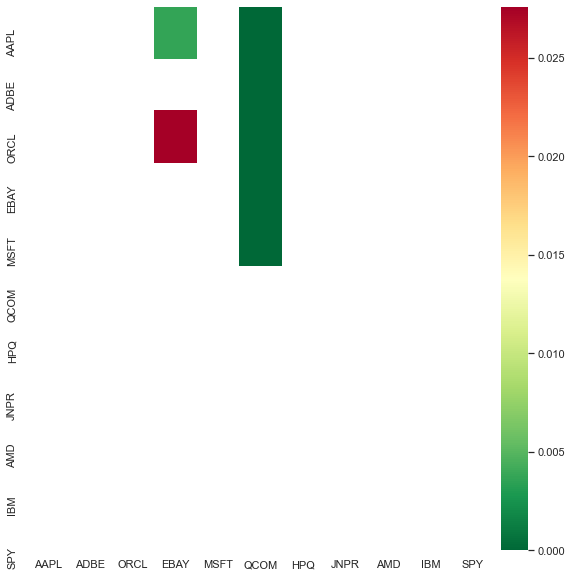

In [166]:
scores, pvalues, pairs = find_cointegrated_pairs(data)
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

In [101]:
#Using Mana-USD and OMG-USD as an example
S1 = data['MANA-USD']
S2 = data['OMG-USD']

score, pvalue, _ = coint(S1, S2)
pvalue

0.02760170952435345

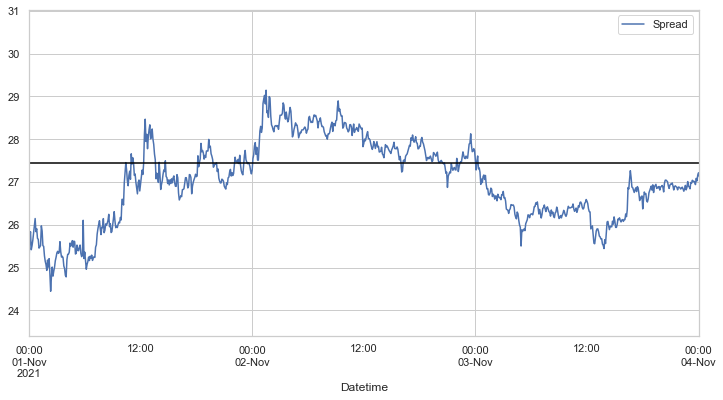

In [102]:
#Calculating Spread
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['MANA-USD']
b = results.params['MANA-USD']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2021-11-1', '2021-11-4')
plt.legend(['Spread']);


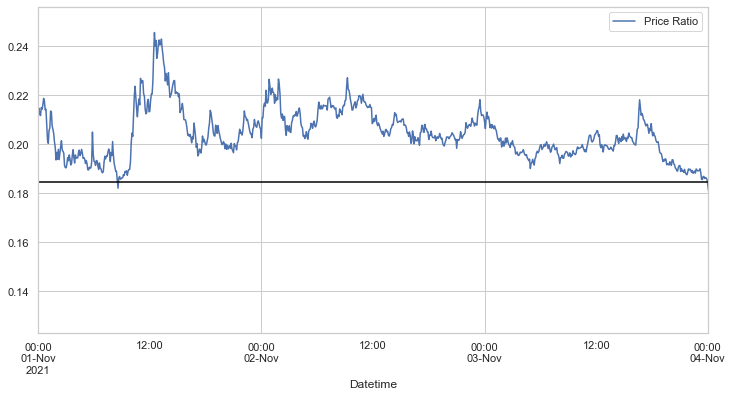

In [103]:
#Ratio between MANA and OMG
ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
plt.xlim('2021-11-1', '2021-11-4')
plt.legend(['Price Ratio']);

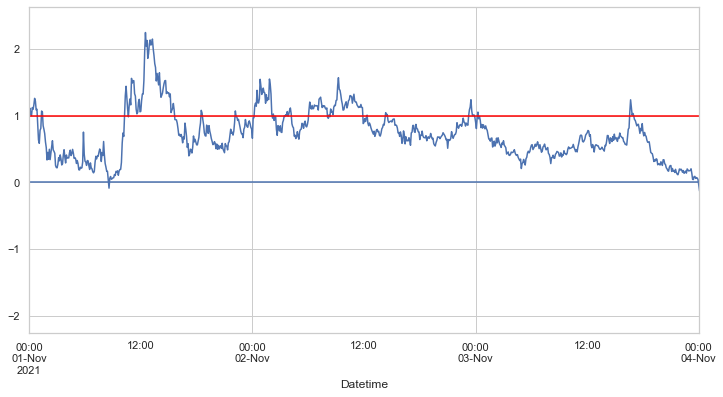

In [105]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.xlim('2021-11-1', '2021-11-4')
plt.show()

In [115]:
#Trading Signals, attempt to trade ratio
#Split into simple train/test
train = ratio[:int(len(ratio) * 0.7)]
test = ratio[int(len(ratio) * 0.7):]

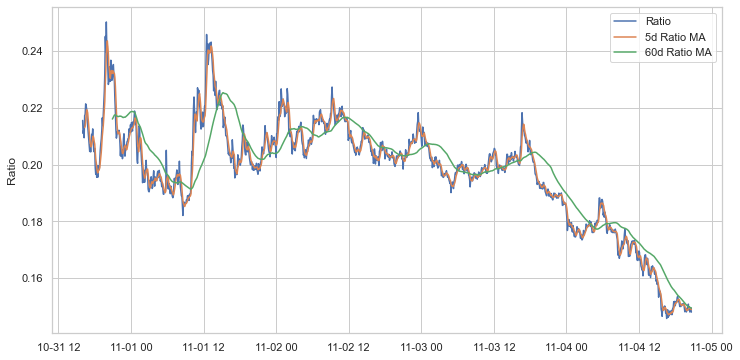

In [116]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

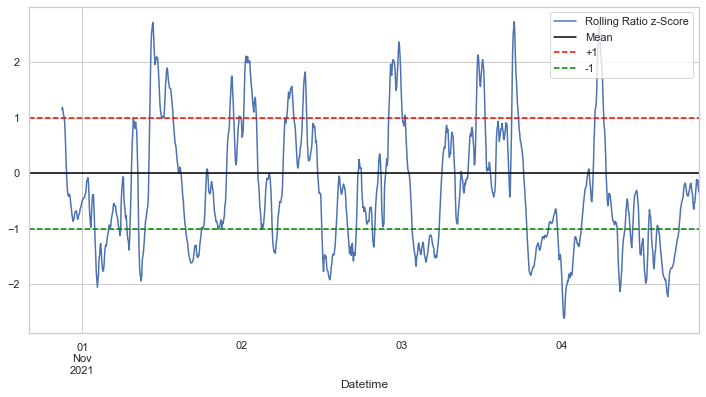

In [117]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

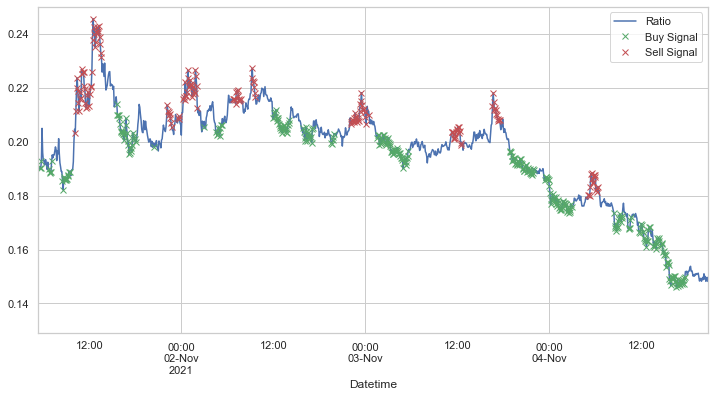

In [161]:
#buy when z-score is below -1, expecation for ratio to increase
#sell when z-score is above 1, expectation for ratio to decrease
plt.figure(figsize=(12,6))

train[160:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='x')
sell[160:].plot(color='r', linestyle='None', marker='x')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [162]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2,ratios):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            
            
    return money

In [172]:
#Top 10 volume altcoins for the day
shortList = ['SOL1','ADA','XRP','SHIB','MANA','TRX','ENJ','DOT1','LTC','OMG']
yahooShortList = []

for n in shortList:
    yahooShortList.append(n+"-USD")
    
start = datetime.datetime(2021, 11, 1)
end = datetime.datetime(2021, 11, 7)

data = yf.download(tickers=yahooShortList, start = start, end = end,interval='5m')['Adj Close']

scores, pvalues, pairs = find_cointegrated_pairs(data)

splt = int(len(ratio) * 0.7)
#tunning for hyperparamter window for 5 min interval
for n in pairs:
    m = trade(data[n[0]].iloc[splt:], data[n[1]].iloc[splt:], 12, 5,ratio)
    print("For pairs: " + n[0] + " " + n[1]+ " " + str(m))

[*********************100%***********************]  10 of 10 completed
For pairs: ADA-USD SHIB-USD 0.0885154098341816
For pairs: ADA-USD SOL1-USD -0.3068239743168031
For pairs: DOT1-USD SHIB-USD 53.32033537897828
For pairs: DOT1-USD SOL1-USD 7.735945839535503
For pairs: ENJ-USD SHIB-USD 2.1200535530057683
For pairs: ENJ-USD SOL1-USD -0.5718413927839214
For pairs: LTC-USD SHIB-USD 7.060190485502602
For pairs: LTC-USD SOL1-USD -54.40123658841989
For pairs: LTC-USD TRX-USD 18.35933095445708
For pairs: MANA-USD OMG-USD 0.5616784417714626
For pairs: MANA-USD SHIB-USD 2.336159011435952
For pairs: MANA-USD SOL1-USD 0.2701058169015016
For pairs: MANA-USD XRP-USD 0.6258975749308413
For pairs: OMG-USD SHIB-USD -6.795206507542325
For pairs: OMG-USD SOL1-USD 4.089750506936358
For pairs: SHIB-USD SOL1-USD 3.417419940210256e-05
For pairs: SHIB-USD TRX-USD 1.0838549899763271e-05
For pairs: SHIB-USD XRP-USD 7.768017885457368e-06
For pairs: SOL1-USD TRX-USD -54.32232404123127
For pairs: SOL1-USD XRP-US

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
